# Introduction

Textual data is so rich in semantics and grammatical rules. Vectorizing texts while encoding all this information and knowledge is not straightforward. Up until now, embeddings have been the most convenient way to vectorize texts. <br>
Text embeddings are a dictionary with the keys being the words and the values being the vectors representing these words. In other words, to vectorize a phrase with three words, we fetch each word's vector from the embedding dictionary and either sum/average/concatenate/etc., these vectors.  

## Objective
This notebook aims to guide you through training your embeddings. <br>
While pre-trained embeddings are more available nowadays, they do not always fit the problem we have at hand. <br>
Medical textual data differs from Twitter conversations, google reviews, etc.,. Thus, we need to train our own embeddings to learn the contextual semantics of our dataset.

## Tasks
This notebook contains code you simply need to run and code cells you need to fill in. <br>
No code from your side is required in code blocks where you see the mention *run only*. <br>
When you see the mention *code*, a chunk of code is required from your side. <br>
When you see the mention *comment*, you will need to write a comment/an explication/ an analysis about the subject at hand.

# 1. Load Wikipedia Corpus (*run only*)

In [1]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.corpora import WikiCorpus
path_to_wiki_dump = datapath("enwiki-latest-pages-articles1.xml-p000000010p000030302-shortened.bz2")
corpus_path = get_tmpfile(".mm")
wiki = WikiCorpus(path_to_wiki_dump)
sentences = list(wiki.get_texts())

# 2. Word2vec skipgram - dimension of the word vectors = 50
## 2.1 Train word2vec with skipgram(*code*)

In [63]:
from gensim.models import Word2Vec
model = Word2Vec(sentences, sg=1, vector_size=100, window=5, min_count=10, workers=4) # sg=1 means we use skipgram

## 2.2 Print the first 20 words in the vocabulary (*code*)

In [33]:
# Get the first 20 words in the vocabulary
vocabulary = list(model.wv.index_to_key[:20])

# Print the vocabulary
print(vocabulary)

['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that', 'with', 'was', 'on', 'are', 'from', 'an', 'or', 'it', 'at', 'be']


## 2.3 Print the embeddings vector for the words "education" and "algorithm" (*code*)

In [64]:
# Get the embedding vectors for the word education
word1 = "education"

vector1 = model.wv[word1]

print(f"Embedding vector for '{word1}':\n{vector1}") # the size of the vector is 100 because we chose it with "vector_size=100" at the beginning of the code

Embedding vector for 'education':
[ 0.21397474  0.24398321 -0.06295305  0.17803128  0.130641    0.24672885
  0.02601397  0.51023275  0.01287233  0.03087802 -0.18024278 -0.44609106
  0.04741907  0.08157848 -0.16338305 -0.40670896  0.22711036 -0.13923475
  0.01010718 -0.40344304  0.48952824 -0.01754975  0.42140743  0.03703431
 -0.27800983  0.27980497  0.35059085  0.2619601  -0.3731904   0.1762779
  0.37152478  0.3146188  -0.30806893  0.0016721  -0.34716946  0.13665688
  0.10730895 -0.14195238 -0.11495253 -0.03061054 -0.34733713 -0.08753224
  0.2786237   0.0174045  -0.14176778 -0.32384214  0.2883451  -0.03306902
 -0.10229889 -0.07472928 -0.5477407  -0.22738127 -0.17163178  0.20091227
 -0.3632894  -0.19909614  0.05948625 -0.12969305 -0.05237025 -0.11636554
  0.459552   -0.03378388 -0.12333908 -0.03716503 -0.03876182  0.56743664
 -0.02939476  0.18746163  0.3876473  -0.10334411 -0.00217869  0.16978504
 -0.17479154  0.21025102  0.44053686  0.11594377  0.3612491   0.15965846
 -0.06977372 -0.06

In [65]:
# Get the embedding vectors for the word algorithm
word2 = "algorithm"

vector2 = model.wv[word2]

print(f"Embedding vector for '{word2}':\n{vector2}")

Embedding vector for 'algorithm':
[ 0.08658136  0.09306072 -0.17202647 -0.1379751  -0.30500293  0.15925889
  0.1376233   0.12010096  0.06782655 -0.08500567 -0.3227992  -0.5227834
 -0.25949058  0.0891331  -0.11254553  0.2982754   0.25123927  0.06679413
  0.05256182 -0.53343785  0.10021142 -0.14962524  0.10822915  0.12407205
 -0.29135066 -0.0506391   0.01206184 -0.10022812  0.1410719   0.03281783
  0.1502937   0.13667499 -0.09309581 -0.5355146  -0.316258    0.45532015
 -0.3313499   0.15644324 -0.14351559 -0.05311684  0.40213102 -0.5093862
 -0.0289331   0.46692172  0.16945314 -0.51838607 -0.39948267 -0.06794546
  0.01229814 -0.09848958 -0.02419077 -0.15399177 -0.13659437  0.57425594
 -0.52452886  0.24776407  0.6225746  -0.02952541 -0.13993545 -0.32528743
 -0.04292178 -0.19520333 -0.3736339   0.03674167 -0.02139371  0.46464875
  0.11432657 -0.29709232 -0.3125202  -0.16052753 -0.17291674  0.37593094
 -0.7326371  -0.02506683  0.5678652  -0.14218634  0.128754    0.09026273
  0.4710681   0.132

## 2.4 Print the similarity between the words (*code*):
- "education" and "algorithm"
- "education" and "latin"
- "education" and "age"
- "education" and "death"
- "spanish" and "latin"

In [71]:
similarity1 = model.wv.similarity(word1, word2)
similarity2 = model.wv.similarity(word1, "latin")
similarity3 = model.wv.similarity(word1, "age")
similarity4 = model.wv.similarity(word1, "death")
similarity5 = model.wv.similarity("spanish", "latin")

print(f"Similarity between '{word1}' and '{word2}': {similarity1:.2f}")
print(f"Similarity between '{word1}' and 'latin' : {similarity2:.2f}")
print(f"Similarity between '{word1}' and 'age': {similarity3:.2f}")
print(f"Similarity between '{word1}' and 'death': {similarity4:.2f}")
print(f"Similarity between 'spanish' and 'latin': {similarity5:.2f}")

Similarity between 'education' and 'algorithm': 0.25
Similarity between 'education' and 'latin' : 0.07
Similarity between 'education' and 'age': 0.45
Similarity between 'education' and 'death': 0.27
Similarity between 'spanish' and 'latin': 0.63


## 2.5 Save the embeddings (*code*)

In [67]:
# Specify the output file for the embeddings
output_file = "word2vec_embeddings.model"

# Save the word embeddings in word2vec format
model.wv.save_word2vec_format(output_file, binary=True)

# 3. Word2vec cbow - dimension of the word vectors = 50
## 3.1 Train word2vec with cbow(*code*)

In [43]:
model_cbow = Word2Vec(sentences, sg=0, vector_size=100, window=5, min_count=5, workers=4) #sg=0 means we use cbow

## 3.2 Print the first 20 words in the vocabulary (*code*)

In [44]:
# Get the first 20 words in the vocabulary
vocabulary = list(model_cbow.wv.index_to_key[:20])

# Print the vocabulary
print(vocabulary)

['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that', 'with', 'was', 'on', 'are', 'from', 'an', 'or', 'it', 'at', 'be']


## 3.3 Print the embeddings vector for the words "education" and "algorithm" (*code*)

In [45]:
# Get the embedding vectors for the word education
word1 = "education"

vector1 = model_cbow.wv[word1]

print(f"Embedding vector for '{word1}':\n{vector1}")

Embedding vector for 'education':
[-0.3502348   0.26286545  0.01581218 -0.12306458  0.14041601 -0.6722581
  0.2583773   1.1245794  -0.09812238 -0.15281436 -0.16957822 -0.33871216
 -0.11328743  0.10914935 -0.33246893 -0.09931662  0.18230066 -0.01624499
 -0.07055073 -0.56533813 -0.00477021 -0.12679613  0.46423095 -0.13087422
  0.10063561  0.28297123 -0.4354837  -0.26737764 -0.4826078   0.34704098
  0.25047395 -0.23460941  0.38759765 -0.5825342  -0.09748754  0.4041826
  0.25126103 -0.28270122  0.17083386 -0.61845386  0.05579714  0.12841979
  0.05024174 -0.546306    0.1623878  -0.1706181  -0.07693789  0.05510825
  0.09346747  0.1421499   0.3533788  -0.7383412  -0.3995546  -0.15205376
 -0.97722524  0.17815666  0.17287278 -0.05302576 -0.07574424  0.50746495
  0.07456101  0.19785017 -0.06879418 -0.09343898 -0.11365817  0.37520096
 -0.34326765  0.16562329 -0.37868083  0.20305513 -0.13148396  0.3838362
  0.34397972  0.06644873  0.3919684   0.25586072  0.53424233  0.00739052
 -0.14118926 -0.2107

In [46]:
# Get the embedding vectors for the word algorithm
word2 = "algorithm"

vector2 = model_cbow.wv[word2]

print(f"Embedding vector for '{word2}':\n{vector2}")

Embedding vector for 'algorithm':
[-3.29689562e-01  1.41954320e-02 -1.05787903e-01 -4.26021188e-01
 -5.82774095e-02 -6.26320541e-01  3.19311738e-01  1.01437604e+00
  2.86741406e-02 -3.89530659e-01 -1.42241105e-01 -2.39057117e-03
 -1.69364333e-01  6.85721785e-02 -5.37549853e-01 -1.10853653e-04
  3.26256752e-01 -8.35068822e-02 -1.97809875e-01 -9.02196884e-01
 -2.46233910e-01 -2.13666469e-01  4.64788198e-01 -2.83367574e-01
  5.45833409e-02  1.45546451e-01 -5.40271699e-01 -6.24327540e-01
 -3.65498573e-01  3.08862686e-01  4.56431508e-01 -2.22654969e-01
  2.19925821e-01 -3.84293705e-01 -6.17225654e-02  4.52767402e-01
 -2.02472284e-01 -2.40968242e-01  6.15528822e-02 -6.40940666e-01
  2.85426646e-01 -1.41853973e-01  1.17588378e-02 -3.25346619e-01
  1.33853376e-01 -5.57897389e-01 -1.55054435e-01 -1.33781344e-01
  1.18735567e-01  5.69692403e-02  2.39917219e-01 -5.32645106e-01
 -1.28054157e-01  3.98585141e-01 -7.28629291e-01  5.40323734e-01
  1.58993721e-01 -1.51060894e-01 -1.42946811e-02  2.9179

## 3.4 Print the similarity between the words (*code*):
- "education" and "algorithm"
- "education" and "latin"
- "education" and "age"
- "education" and "death"
- "spanish" and "latin"

In [72]:
similarity1 = model_cbow.wv.similarity(word1, word2)
similarity2 = model_cbow.wv.similarity(word1, "latin")
similarity3 = model_cbow.wv.similarity(word1, "age")
similarity4 = model_cbow.wv.similarity(word1, "death")
similarity5 = model_cbow.wv.similarity("spanish", "latin")

print(f"Similarity between '{word1}' and '{word2}': {similarity1:.2f}")
print(f"Similarity between '{word1}' and 'latin' : {similarity2:.2f}")
print(f"Similarity between '{word1}' and 'age': {similarity3:.2f}")
print(f"Similarity between '{word1}' and 'death': {similarity4:.2f}")
print(f"Similarity between 'spanish' and 'latin': {similarity5:.2f}")

Similarity between 'education' and 'algorithm': 0.86
Similarity between 'education' and 'latin' : 0.96
Similarity between 'education' and 'age': 0.93
Similarity between 'education' and 'death': 0.92
Similarity between 'spanish' and 'latin': 0.94


## 3.5 Save the embeddings (*code*)

In [48]:
# Specify the output file for the embeddings
output_file = "word2vec_embeddings_cbow.txt"

# Save the word embeddings in word2vec format
model_cbow.wv.save_word2vec_format(output_file, binary=False)

# 4. Visualizing Embeddings
## 4.1 SkipGram Model
### 4.1.1 Set the variable *model* to the skipgram word2vec model trained and saved in section 2 (*code*)

In [56]:
# import gensim
# model = gensim.models.Word2Vec.load('/content/word2vec_embeddings.model')

UnpicklingError: ignored

### 4.1.2 Clean the model's vocabulary from stopwords using the nltk library (*code*)
**NB:** if you did not know how to do this part, set the variable *words_vocab_without_sw* to *list(model.wv.index_to_key )*  i.e.  <br>

```
words_vocab_without_sw = list(model.wv.index_to_key )
```

In [68]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

words_vocab = list(model.wv.index_to_key)
print("Size of Vocabulary before Stop Words removal:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:10])

# Get the list of stopwords
stop_words = set(stopwords.words('english'))
# Remove each word from the vocavulary that is in the list of stopwords
words_vocab_without_sw = [word for word in words_vocab if word not in stop_words]

print("Size of Vocabulary after Stop Words removal:",len(words_vocab_without_sw))
print("Few words in Vocabulary",words_vocab_without_sw[:10])

Size of Vocabulary before Stop Words removal: 5209
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that']
Size of Vocabulary after Stop Words removal: 5091
Few words in Vocabulary ['also', 'one', 'first', 'state', 'used', 'two', 'may', 'many', 'new', 'time']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4.1.3 Visualizing the words that are semantically close to ['education', 'country', 'medicine', 'sports', 'movie'] using the Skipgram model (*run only*)

#### Hyperparameters of TSNE

1. n_components: the dimension of the value space.
2. perplexity: the number of neighbours.
3. n_iter: the maximum number of iterations for the optimization.
4. init: the embedding's initialization.

t-SNE requires good amount of hyperparameter tuning to give effective results.  <br>
References: <br>
- [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).
- [Article](https://distill.pub/2016/misread-tsne/)

In [69]:
from sklearn.manifold import TSNE
import numpy as np, matplotlib.pyplot as plt, matplotlib.cm as cm
%matplotlib inline
def cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie']):
    embedding_clusters = []
    word_clusters = []

    for word in cluster_key_words:
        embeddings_of_words_similar_to_key_word = []
        words_similar_to_key_word = []
        for similar_word, _ in model.wv.most_similar(word, topn=30):
            words_similar_to_key_word.append(similar_word)
            embeddings_of_words_similar_to_key_word.append(model.wv[similar_word])
        embedding_clusters.append(embeddings_of_words_similar_to_key_word)
        word_clusters.append(words_similar_to_key_word)

    print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word
    print("we have {} clusters".format(len(word_clusters)))
    print("Word in Cluster 1 of EDUCATION :",word_clusters[1])
    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape #geting the dimensions
    tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020)
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it
    return  embeddings_en_2d, word_clusters

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

Embedding clusters: [ 0.27499327  0.29934812 -0.05171707  0.25731596  0.08504269  0.13557006
  0.0587827   0.4865615  -0.07600904 -0.01047464 -0.24505834 -0.38577354
 -0.13412747  0.10305841  0.04552272 -0.3948793   0.19003044 -0.05933069
  0.09732646 -0.4425422   0.49762362 -0.02537723  0.3625269  -0.02588683
 -0.14696962  0.297541    0.27930522  0.2386718  -0.12163848  0.1762972
  0.3823386   0.26557153 -0.24524075 -0.02512793 -0.16201952  0.15207578
  0.10644489 -0.11998765 -0.02907564 -0.15032606 -0.354575   -0.1653087
  0.28702947 -0.05865861 -0.23352227 -0.27563348  0.19288747 -0.02426027
 -0.09065716  0.00974998 -0.4626381  -0.21499977 -0.11233296  0.08293248
 -0.10105065 -0.04585221  0.04273114 -0.16759619  0.09309521 -0.09954155
  0.29655862 -0.12341067 -0.07853365  0.02898677  0.04559761  0.48497066
 -0.04570745  0.15247592  0.02193219 -0.01667827 -0.07022793  0.19839516
 -0.18698163  0.15439363  0.47228488  0.00504394  0.12797798  0.23076446
 -0.14297725 -0.09365083  0.07191

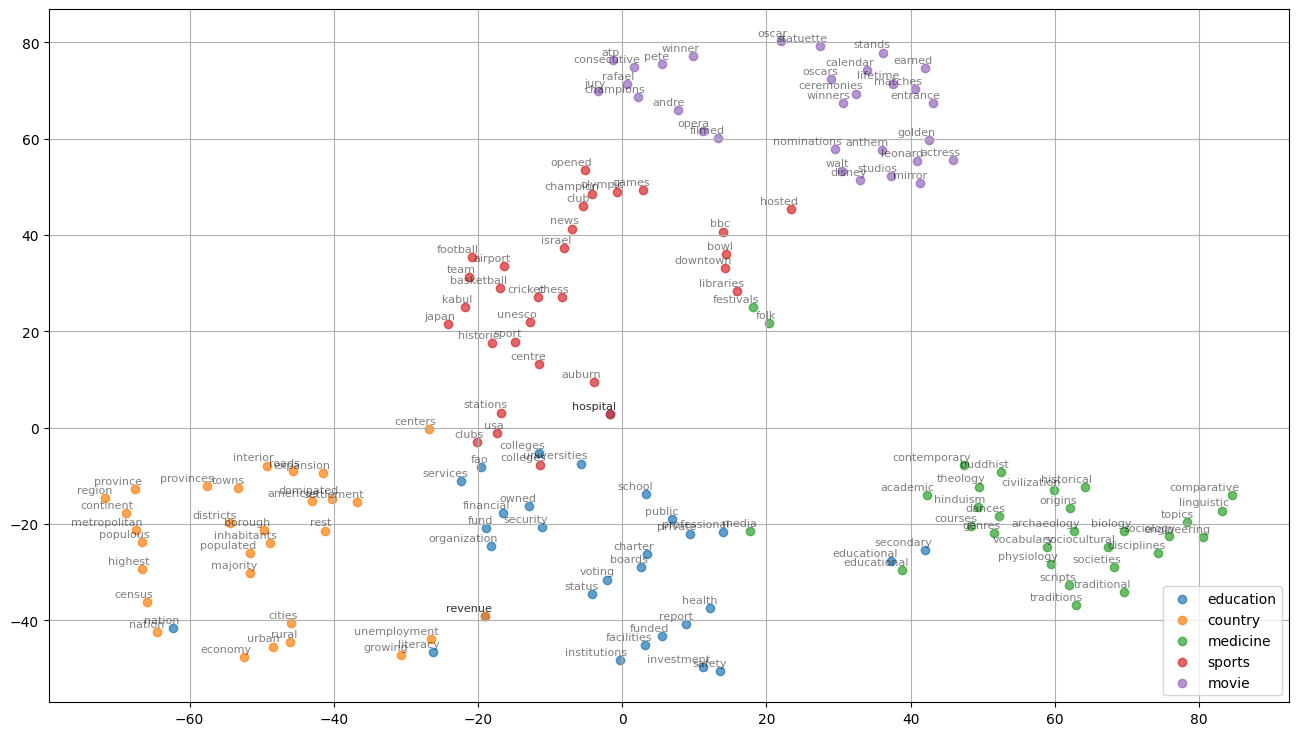

In [70]:
cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie']
embeddings_en_2d, word_clusters = cluster_words(model, cluster_key_words = cluster_key_words)
tsne_plot_similar_words(cluster_key_words, embeddings_en_2d, word_clusters)

## 4.2 CbOW
### 4.2.1 Set the variable *model* to the cbow word2vec model trained and saved in section 3 (*code*)

In [ ]:
model = ...

### 4.2.2 Clean the model's vocabulary from stopwords using the nltk library (*code*)
**NB:** if you did not know how to do this part, set the variable *words_vocab_without_sw* to *list(model.wv.index_to_key )*  i.e.  <br>

```
words_vocab_without_sw = list(model.wv.index_to_key )
```

In [ ]:
words_vocab = list(model_cbow.wv.index_to_key )
print("Size of Vocabulary before Stop Words removal:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:10])

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

words_vocab_without_sw = [word for word in words_vocab if word not in stop_words]
print("Size of Vocabulary after Stop Words removal:",len(words_vocab_without_sw))
print("Few words in Vocabulary",words_vocab_without_sw[:10])

Size of Vocabulary before Stop Words removal: 9002
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that']
Size of Vocabulary after Stop Words removal: 8881
Few words in Vocabulary ['also', 'one', 'first', 'state', 'used', 'two', 'may', 'many', 'new', 'time']


### 4.2.3 Visualizing the words that are semantically close to ['education', 'country', 'medicine', 'sports', 'movie'] using the CBoW model (*run only*)

Embedding clusters: [-2.5775829e-01  3.1459671e-01  3.1518877e-02  1.3075455e-01
  1.5105003e-01 -4.1715670e-01  3.3317547e-02  9.0474308e-01
 -1.2764497e-01 -1.4746973e-01  1.4973868e-03 -1.7033046e-01
 -1.0253296e-01  1.7066078e-01 -9.0418696e-02 -1.3448001e-01
  1.9919108e-01  1.2957883e-01 -3.0065784e-01 -2.9223415e-01
  1.2446090e-01 -1.8194348e-01  2.8889963e-01 -7.4647926e-02
  5.5854876e-02  1.1457956e-01 -3.4604219e-01 -9.0517096e-02
 -2.9680750e-01  2.0823570e-01  2.9103892e-02 -2.7043661e-01
  2.2531992e-01 -4.1533899e-01 -2.2786149e-01  3.9360833e-01
  1.5387043e-01 -1.7600532e-01  1.1346876e-01 -3.2627508e-01
  3.6302689e-02  8.6150244e-02  1.4518554e-04 -3.9563406e-01
  2.8327482e-02 -6.6909455e-02 -5.8419269e-02  6.4814374e-02
  4.6222169e-02  7.2330631e-02  1.8916097e-01 -4.6201143e-01
 -2.9016495e-01 -1.4087553e-01 -6.8317282e-01  1.4294395e-01
  7.2129145e-02 -4.4751883e-02 -4.2105865e-02  1.6380531e-01
 -8.1060275e-02  2.8643888e-01 -1.2125368e-01 -1.4800721e-01
 -2.

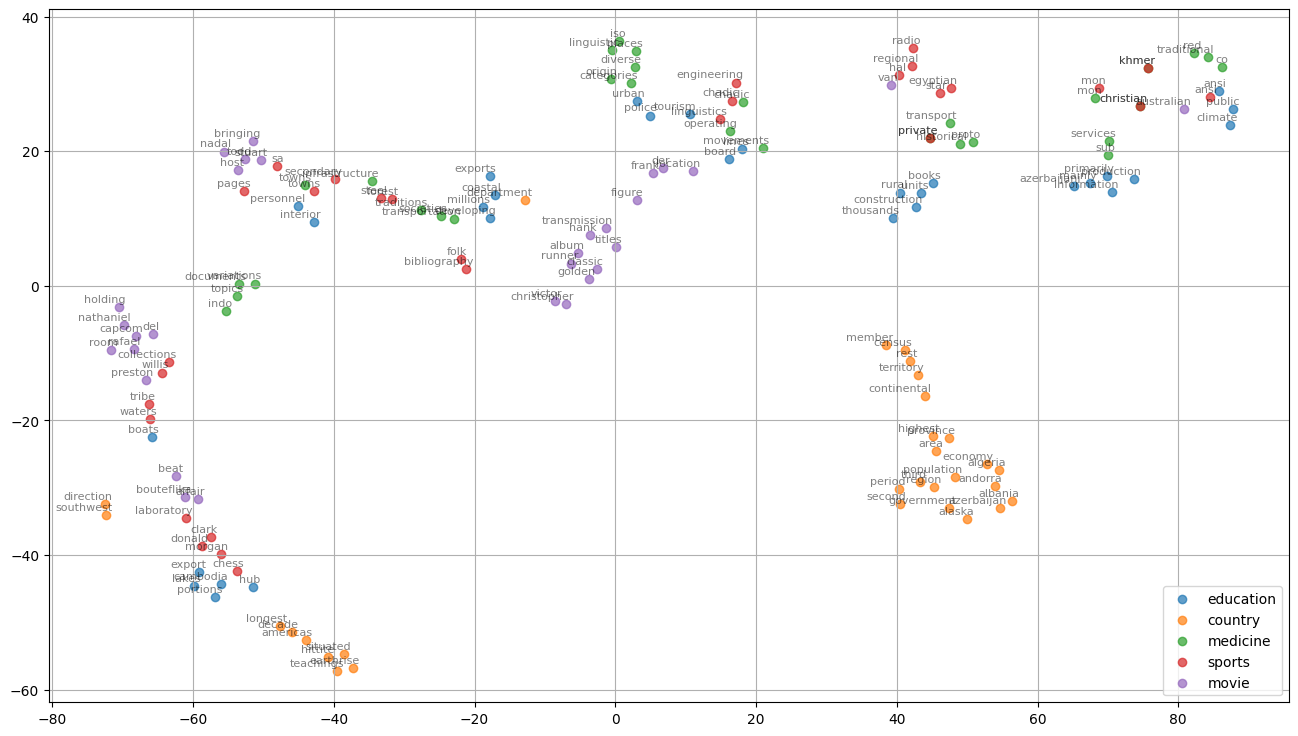

In [ ]:
embeddings_en_2d, word_clusters = cluster_words(model_cbow, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie'])
tsne_plot_similar_words(cluster_key_words, embeddings_en_2d, word_clusters)

## 4.3 Compare the two figures in section 4.1.3 and 4.2.3 and comment (*comment*)

In [ ]:
"""
First, we can notice that the skipgram model made much more individual clusters.
Indeed, each cluster occupy their own zone in the map. The words composing a
cluster (same color) are not parse and are not distributed into the other
clusters. More precisely, if we take a look at the words composing a cluster,
for example the cluster for "movie" almost only contains words that can refer to
a movie (winners, ceremonies, oscar, studios etc.). Same for "country",
"sports",  even if it is less the case for "education" and "medicine". Moreover,
we can notice that words that can be close to 2 clusters at a time are also
close on the figure. For example, the words "universities" and "colleges" can be
shared between the clusters "sports" and "education".

On the other hand, the CBoW model did not make individuals clusters. Indeed, a
lot of words are scattered around and are not close to other words with the same
color (same cluster). However, for the cluster of "country" for example, a lot
of words were seen as semantically close to each others such as "continental",
"area", "alaska" etc. To conclude, the CBoW model did not make a good job at
seperating the clusters from each others while Skipgram did it better.
"""